In [1]:
!pip install pandas
!pip install matplotlib
!pip install plotly

  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)


In [4]:
import pandas as pd

In [5]:
#해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
#다운로드와 동시에 Pandas에 excel 파일이 load가 되는 구조입니다.
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#stock_code.head()

In [6]:
# 데이터에서 정렬이 따로 필요하지는 않지만 테스트겸 Pandas sort_values를 이용하여 정렬을 시도해봅니다.
stock_code.sort_values(['상장일'], ascending=True)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
1001,경성전기,28740,NaN,NaN,1956-03-03,12월,NaN,NaN,NaN
1760,한진중공업홀딩스,3480,연료용 가스 제조 및 배관공급업,지주회사,1956-03-03,12월,"조남호, 조원국",http://www.hhic-holdings.com,경기도
73,한국운수,28750,NaN,NaN,1956-03-03,12월,NaN,NaN,NaN
3428,스탠다드차타드은행,110,보험업,"은행업,신탁업(대출금이자,유가증권수익,수입수수료)",1956-03-03,12월,리차드 힐,http://www.scfirstbank.com,서울특별시
3606,유수홀딩스,700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시
...,...,...,...,...,...,...,...,...,...
962,한국파마,32300,의약품 제조업,"완제의약품(정신신경계, 소화기계, 순환기계, 항생항균, 기타)",2020-08-10,12월,박은희,http://koreapharma.co.kr,경기도
1392,영림원소프트랩,60850,소프트웨어 개발 및 공급업,"ERP Package, 유지 관리 등",2020-08-12,12월,권영범,http://ksystem.co.kr,서울특별시
351,브랜드엑스코퍼레이션,337930,기타 정보 서비스업,"애슬레저의류, 생활/청결 용품",2020-08-13,12월,"강민준, 이수연",http://www.brandxcorp.com/,서울특별시
2756,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩


In [7]:
# 필요한 것은 "회사명"과 "종목코드" 이므로 필요없는 column들은 제외
stock_code = stock_code[['회사명', '종목코드']] 

In [8]:
# 한글 컬럼명을 영어로 변경 
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
#stock_code.head()

In [9]:
# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
stock_code.code = stock_code.code.map('{:06d}'.format) 

In [10]:
# 넥슨GT의 일별 시세 url 가져오기 
company='넥슨지티' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
page = 1

url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
url = '{url}&page={page}'.format(url=url, page=page)
print(url)
df = pd.read_html(url, header=0)[0]
df.head()

http://finance.naver.com/item/sise_day.nhn?code=041140&page=1


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.08.18,18900.0,150.0,18500.0,19300.0,17800.0,457736.0
2,2020.08.14,19050.0,50.0,18950.0,19850.0,18850.0,1433258.0
3,2020.08.13,19100.0,300.0,19200.0,19750.0,18800.0,1650506.0
4,2020.08.12,19400.0,750.0,18000.0,20400.0,17600.0,5502661.0


In [11]:
company='넥슨지티' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거

df = pd.DataFrame()
for page in range(1,21):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    print(url)
    df = df.append(pd.read_html(url, header=0)[0], ignore_index=True)

http://finance.naver.com/item/sise_day.nhn?code=041140&page=1
http://finance.naver.com/item/sise_day.nhn?code=041140&page=2
http://finance.naver.com/item/sise_day.nhn?code=041140&page=3
http://finance.naver.com/item/sise_day.nhn?code=041140&page=4
http://finance.naver.com/item/sise_day.nhn?code=041140&page=5
http://finance.naver.com/item/sise_day.nhn?code=041140&page=6
http://finance.naver.com/item/sise_day.nhn?code=041140&page=7
http://finance.naver.com/item/sise_day.nhn?code=041140&page=8
http://finance.naver.com/item/sise_day.nhn?code=041140&page=9
http://finance.naver.com/item/sise_day.nhn?code=041140&page=10
http://finance.naver.com/item/sise_day.nhn?code=041140&page=11
http://finance.naver.com/item/sise_day.nhn?code=041140&page=12
http://finance.naver.com/item/sise_day.nhn?code=041140&page=13
http://finance.naver.com/item/sise_day.nhn?code=041140&page=14
http://finance.naver.com/item/sise_day.nhn?code=041140&page=15
http://finance.naver.com/item/sise_day.nhn?code=041140&page=16
h

In [12]:
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 

# 상위 5개 데이터 확인 
df.head()

,date,close,diff,open,high,low,volume
298,2019-10-30,7250,60,7270,7900,7250,3952394
297,2019-10-31,7290,40,7290,7400,7200,531605
296,2019-11-01,7360,70,7300,7400,7180,412637
295,2019-11-04,7500,140,7360,7560,7300,467119
294,2019-11-05,7470,30,7550,7580,7370,375544


In [13]:
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px

# %matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

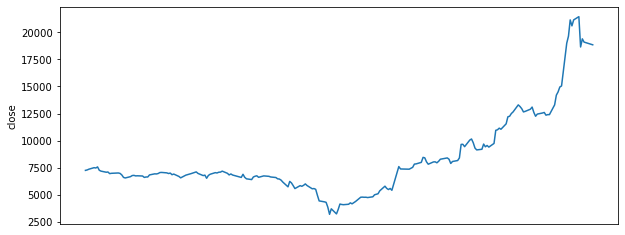

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.xlabel('')
plt.ylabel('close')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig(company + ".png")
plt.show()

In [23]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(go.Scatter(
    x = df['Date'],
    y = df['mavg']
))

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)

fig.show()